<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Modelos-de-dispers%C3%A3o-e-qualidade-da-%C3%A1gua/modelando_tudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ideia central

- Começar a modelar de forma "simples", para, posteriormente, iniciar o processo de modificação das equações, transformando os sistemas de equações em um modelo mais robusto, com maior representabilidade da realidade.

# OD-DBO

- Irei iniciar a modelagem utilizando algo pronto, das eqs. que o modelo de Streeter-Phelps utiliza para a solução analítica do problema.

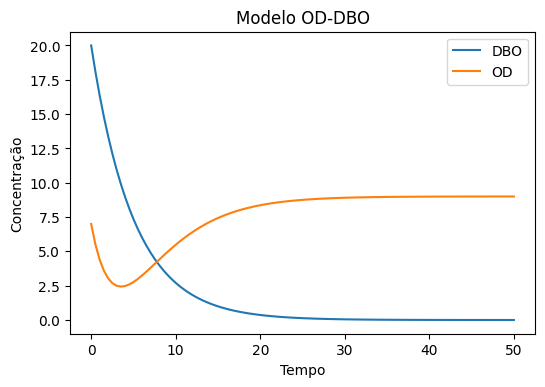

In [4]:
# Modelagem OD-DBO

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def odes(x, t):
    global Os

    kd = 0.2
    ka = 0.3

    L = x[0]
    O = x[1]

    dLdt = -kd * L
    dOdt = -kd * L + ka * (Os - O)

    return dLdt, dOdt


L0 = 20
O0 = 7
Os = 9

x0 = [L0, O0]

t = np.linspace(0, 50, 100)

x = odeint(odes, x0, t)

L = x[:, 0]
O = x[:, 1]

plt.figure(dpi=100)
plt.title("Modelo OD-DBO")
plt.plot(t, L, label="DBO")
plt.plot(t, O, label="OD")
plt.xlabel("Tempo")
plt.ylabel("Concentração")
plt.legend(loc="best")
plt.show()

# Modelagem do ciclo do nitrogênio

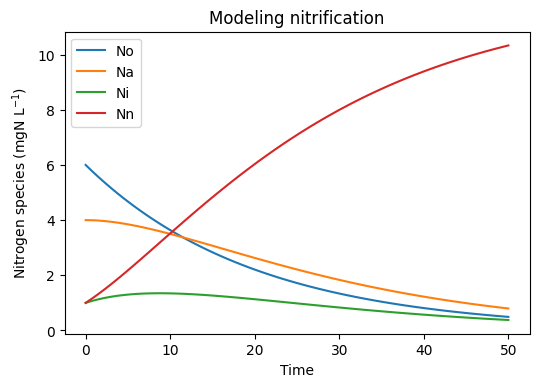

In [25]:
# Modelagem nitrificação (CHAPRA, p. 426)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def odes(x, t):
    # The subscripts o, a, i, and n denote organic, ammonium, nitrite,
    # and nitrate, respectively.
    kin = 0.2  # 0.75 d-1
    kai = 0.075  # d-1
    koa = 0.05  # d-1
    roa = 3.43  # gO gN-1
    roi = 1.14  # gO gN-1
    ron = roa + roi  # gO gN-1

    # Chute:
    ka = 0.1  # d-1
    Ni = 3  # mg L-1
    D = 1

    No = x[0]
    Na = x[1]
    Ni = x[2]
    Nn = x[3]

    dNodt = -koa * No
    dNadt = koa * No - kai * Na
    dNidt = kai * Na - kin * Ni
    dNndt = kin * Ni

    # An oxygen deficit balance can be written as:
    dDdt = roa * kai * Na + roi * kin * Ni - ka * D

    return dNodt, dNadt, dNidt, dNndt, dDdt


No0 = 6
Na0 = 4
Ni0 = 1
Nn0 = 1
D0 = 1

x0 = [No0, Na0, Ni0, Nn0, D0]

t = np.linspace(0, 50, 100)

x = odeint(odes, x0, t)

No = x[:, 0]
Na = x[:, 1]
Ni = x[:, 2]
Nn = x[:, 3]
D = x[:, 4]

plt.figure(dpi=100)
plt.title("Modeling nitrification")
plt.plot(t, No, label="No")
plt.plot(t, Na, label="Na")
plt.plot(t, Ni, label="Ni")
plt.plot(t, Nn, label="Nn")
# plt.plot(t, D,  label='D')
plt.xlabel("Time")
plt.ylabel("Nitrogen species ($\mathrm{mgN~L}^{- 1}$)")
plt.legend(loc="best")
plt.show()

# O próximo gráfico seria DO (mg L-1) pelo Time, plotando as variáveis
# 'Nitrificatiob model' e 'NBOD'
